In [1]:
%matplotlib inline
import warnings
warnings.filterwarnings('always')
warnings.filterwarnings('ignore')
import numpy as np
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
cwd = os.getcwd()  # Get the current working directory (cwd)
files = os.listdir(cwd)  # Get all the files in that directory
print("Files in %r: %s" % (cwd, files))


Files in 'C:\\Users\\Utente\\Desktop\\Università\\Pisa\\Primo semestre\\Data Mining 1\\Progetto': ['.ipynb_checkpoints', 'Classification e Pattern Mining Lia.ipynb', 'Codice Progetto.ipynb', 'DataMining_2.pdf', 'hands_on_dm1_classification.ipynb', 'NuovoDataset.csv', "Project_D'Orsi_Di Virgilio_Lelli_Trapanese.pdf", 'README_asa_notebook.ipynb', 'README_seismic.txt', 'Report.pdf', 'seismic-bumps.csv', 'SeismicBumps_Lia.ipynb', 'Seismic_Bumps', 'seismic_bumps.zip', 'spiegazioneProgettoDataMining.txt', 'Untitled.ipynb']


# Description Seismic bumps 

In [3]:
data = pd.read_csv('seismic-bumps.csv')
#https://archive.ics.uci.edu/ml/datasets/seismic-bumps

In [4]:
#high energy seismic hazard (pericolo sismico), >10^4 Joule, that occurs in underground mines
#data collected by seismic and seismoacoustic monitoring systems
#it's a very complex topic, so far we cannot predict precisely sismic hazards
#lot of methods used for better hazard prediction, such as 
#machine learning methods, data clustering techniques, artificial neural networks
#the results of those methods can be reported in two forms: hazardous and non-hazardous (pericolosi/non pericolosi)
#goal: predict sismic activities that can cause a rockburst (esplosione di pietre)

# Description Seismic bumbs data set

In [5]:
#rows = summary statement about seismic activity in the rock mass within 8 hours
#decision attribute = 1 means that in the next 8 hours any seismic bumps with energy > 10^4 J are registered
#hazards prediction bases on relationship between 
#energy of recorded tremors and eismoacoustic activity with the possibility of rockburst occurrence
#the dataset is composed by unbalanced distribution of positive and negative examples. 
#170 pos example that are represented by class 1

# Attribute

In [6]:
"""
1- seismic​: result of shift seismic hazard assessment in the mine working obtained by the seismic method (a -
lack of hazard, b - low hazard, c - high hazard, d - danger state);
seismoacoustic​: result of shift seismic
hazard assessment in the mine working obtained by the seismoacoustic method;
#2- shift​: information about type of a shift (W - coal-getting, N -preparation shift);
genergy​: seismic energy recorded within previous shift by the most active geophone (GMax) out of
geophones monitoring the longwall;
gpuls​: a number of pulses recorded within previous shift by GMax;
gdenergy​: a deviation of energy recorded within previous shift by GMax from average energy recorded
during eight previous shifts;
gdpuls​: a deviation of a number of pulses recorded within previous shift by GMax from average number of
pulses recorded during eight previous shifts;
hazard​: result of shift seismic hazard assessment in the mine working obtained by the seismoacoustic
method based on registration coming form GMax only;
nbumps​: the number of seismic bumps recorded within previous shift;
nbumps2​: the number of seismic bumps (in energy range [10^2,10^3)) registered within previous shift;
nbumps3​: the number of seismic bumps (in energy range [10^3,10^4)) registered within previous shift;
nbumps4​: the number of seismic bumps (in energy range [10^4,10^5)) registered within previous shift;
nbumps5​: the number of seismic bumps (in energy range [10^5,10^6)) registered within the last shift;
nbumps6​: the number of seismic bumps (in energy range [10^6,10^7)) registered within previous shift;
nbumps7​: the number of seismic bumps (in energy range [10^7,10^8)) registered within previous shift;
nbumps89​: the number of seismic bumps (in energy range [10^8,10^10)) registered within previous shift;
energy​: total energy of seismic bumps registered within previous shift;
maxenergy​: the maximum energy of the seismic bumps registered within previous shift;
class​: the decision attribute - '1' means that high energy seismic bump occurred in the next shift
('hazardous state'), '0' means that no high energy seismic bumps occurred in the next shift
('non-hazardous state')
"""

"\n1- seismic\u200b: result of shift seismic hazard assessment in the mine working obtained by the seismic method (a -\nlack of hazard, b - low hazard, c - high hazard, d - danger state);\nseismoacoustic\u200b: result of shift seismic\nhazard assessment in the mine working obtained by the seismoacoustic method;\n#2- shift\u200b: information about type of a shift (W - coal-getting, N -preparation shift);\ngenergy\u200b: seismic energy recorded within previous shift by the most active geophone (GMax) out of\ngeophones monitoring the longwall;\ngpuls\u200b: a number of pulses recorded within previous shift by GMax;\ngdenergy\u200b: a deviation of energy recorded within previous shift by GMax from average energy recorded\nduring eight previous shifts;\ngdpuls\u200b: a deviation of a number of pulses recorded within previous shift by GMax from average number of\npulses recorded during eight previous shifts;\nhazard\u200b: result of shift seismic hazard assessment in the mine working obtaine

# Code- Data Understanding

In [7]:
data
#returns the dataset

,seismic,seismoacoustic,shift,genergy,gpuls,gdenergy,gdpuls,hazard,nbumps,nbumps2,nbumps3,nbumps4,nbumps5,nbumps6,nbumps7,nbumps89,energy,maxenergy,class
0,a,a,N,15180,48,-72,-72,a,0,0,0,0,0,0,0,0,0,0,0
1,a,a,N,14720,33,-70,-79,a,1,0,1,0,0,0,0,0,2000,2000,0
2,a,a,N,8050,30,-81,-78,a,0,0,0,0,0,0,0,0,0,0,0
3,a,a,N,28820,171,-23,40,a,1,0,1,0,0,0,0,0,3000,3000,0
4,a,a,N,12640,57,-63,-52,a,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2579,b,a,W,81410,785,432,151,b,0,0,0,0,0,0,0,0,0,0,0
2580,b,a,W,42110,555,213,118,a,0,0,0,0,0,0,0,0,0,0,0
2581,b,a,W,26960,540,101,112,a,0,0,0,0,0,0,0,0,0,0,0
2582,a,a,W,16130,322,2,2,a,0,0,0,0,0,0,0,0,0,0,0


In [8]:
data.head()
#returns the first five rows of the dataset

,seismic,seismoacoustic,shift,genergy,gpuls,gdenergy,gdpuls,hazard,nbumps,nbumps2,nbumps3,nbumps4,nbumps5,nbumps6,nbumps7,nbumps89,energy,maxenergy,class
0,a,a,N,15180,48,-72,-72,a,0,0,0,0,0,0,0,0,0,0,0
1,a,a,N,14720,33,-70,-79,a,1,0,1,0,0,0,0,0,2000,2000,0
2,a,a,N,8050,30,-81,-78,a,0,0,0,0,0,0,0,0,0,0,0
3,a,a,N,28820,171,-23,40,a,1,0,1,0,0,0,0,0,3000,3000,0
4,a,a,N,12640,57,-63,-52,a,0,0,0,0,0,0,0,0,0,0,0


In [9]:
data.describe()
#returns the statistical features of the dataset

,genergy,gpuls,gdenergy,gdpuls,nbumps,nbumps2,nbumps3,nbumps4,nbumps5,nbumps6,nbumps7,nbumps89,energy,maxenergy,class
count,2.584000e+03,2584.000000,2584.000000,2584.000000,2584.000000,2584.000000,2584.000000,2584.000000,2584.000000,2584.0,2584.0,2584.0,2584.000000,2584.000000,2584.000000
mean,9.024252e+04,538.579334,12.375774,4.508901,0.859520,0.393576,0.392802,0.067724,0.004644,0.0,0.0,0.0,4975.270898,4278.850619,0.065789
std,2.292005e+05,562.652536,80.319051,63.166556,1.364616,0.783772,0.769710,0.279059,0.068001,0.0,0.0,0.0,20450.833222,19357.454882,0.247962
min,1.000000e+02,2.000000,-96.000000,-96.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.000000
25%,1.166000e+04,190.000000,-37.000000,-36.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.000000
50%,2.548500e+04,379.000000,-6.000000,-6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.000000
75%,5.283250e+04,669.000000,38.000000,30.250000,1.000000,1.000000,1.000000,0.000000,0.000000,0.0,0.0,0.0,2600.000000,2000.000000,0.000000
max,2.595650e+06,4518.000000,1245.000000,838.000000,9.000000,8.000000,7.000000,3.000000,1.000000,0.0,0.0,0.0,402000.000000,400000.000000,1.000000


In [10]:
data.shape
#return the number of columns and the number of rows

(2584, 19)

In [11]:
#pandas function that see the duplicates in the dataset
#there are couples of rows duplicated one after the original (e.g 87e89-88-90)
data[data.duplicated(keep = False) == True]

,seismic,seismoacoustic,shift,genergy,gpuls,gdenergy,gdpuls,hazard,nbumps,nbumps2,nbumps3,nbumps4,nbumps5,nbumps6,nbumps7,nbumps89,energy,maxenergy,class
87,a,a,N,63550,325,15,35,a,0,0,0,0,0,0,0,0,0,0,0
88,a,a,W,194580,697,-35,-32,a,0,0,0,0,0,0,0,0,0,0,0
89,a,a,N,63550,325,15,35,a,0,0,0,0,0,0,0,0,0,0,0
90,a,a,W,194580,697,-35,-32,a,0,0,0,0,0,0,0,0,0,0,0
970,a,b,N,5250,66,-49,36,a,0,0,0,0,0,0,0,0,0,0,0
971,a,b,N,19420,60,98,20,a,0,0,0,0,0,0,0,0,0,0,0
972,a,b,N,5250,66,-49,36,a,0,0,0,0,0,0,0,0,0,0,0
973,a,b,N,19420,60,98,20,a,0,0,0,0,0,0,0,0,0,0,0
1015,a,a,N,590,11,-74,-72,a,0,0,0,0,0,0,0,0,0,0,0
1016,a,a,N,3720,43,75,8,a,0,0,0,0,0,0,0,0,0,0,0


In [12]:
data.info()
#if we would like to see just the types of the attribute we use
#data.dtypes

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2584 entries, 0 to 2583
Data columns (total 19 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   seismic         2584 non-null   object
 1   seismoacoustic  2584 non-null   object
 2   shift           2584 non-null   object
 3   genergy         2584 non-null   int64 
 4   gpuls           2584 non-null   int64 
 5   gdenergy        2584 non-null   int64 
 6   gdpuls          2584 non-null   int64 
 7   hazard          2584 non-null   object
 8   nbumps          2584 non-null   int64 
 9   nbumps2         2584 non-null   int64 
 10  nbumps3         2584 non-null   int64 
 11  nbumps4         2584 non-null   int64 
 12  nbumps5         2584 non-null   int64 
 13  nbumps6         2584 non-null   int64 
 14  nbumps7         2584 non-null   int64 
 15  nbumps89        2584 non-null   int64 
 16  energy          2584 non-null   int64 
 17  maxenergy       2584 non-null   int64 
 18  class   

In [13]:
data.isna().any()
#returns if there are missing values

seismic           False
seismoacoustic    False
shift             False
genergy           False
gpuls             False
gdenergy          False
gdpuls            False
hazard            False
nbumps            False
nbumps2           False
nbumps3           False
nbumps4           False
nbumps5           False
nbumps6           False
nbumps7           False
nbumps89          False
energy            False
maxenergy         False
class             False
dtype: bool

In [14]:
data.columns
#returns the name of the columns 

Index(['seismic', 'seismoacoustic', 'shift', 'genergy', 'gpuls', 'gdenergy',
       'gdpuls', 'hazard', 'nbumps', 'nbumps2', 'nbumps3', 'nbumps4',
       'nbumps5', 'nbumps6', 'nbumps7', 'nbumps89', 'energy', 'maxenergy',
       'class'],
      dtype='object')

In [15]:
data['hazard'].unique()
#returns an array with the type of value of the attribute 'hazard'

array(['a', 'b', 'c'], dtype=object)

In [16]:
data['seismoacoustic'].unique()

array(['a', 'b', 'c'], dtype=object)

In [17]:
data['seismic'].unique()

array(['a', 'b'], dtype=object)

In [18]:
data['shift'].unique()

array(['N', 'W'], dtype=object)

In [19]:
data.nunique()
#count number of distinct elements in a specified axis 
#has as parameters:
#axis='0|1' (0 for index, 1 for columns) and dropna='True|False' (non-include or include NaN values)

seismic              2
seismoacoustic       3
shift                2
genergy           2212
gpuls             1128
gdenergy           334
gdpuls             292
hazard               3
nbumps              10
nbumps2              7
nbumps3              7
nbumps4              4
nbumps5              2
nbumps6              1
nbumps7              1
nbumps89             1
energy             242
maxenergy           33
class                2
dtype: int64

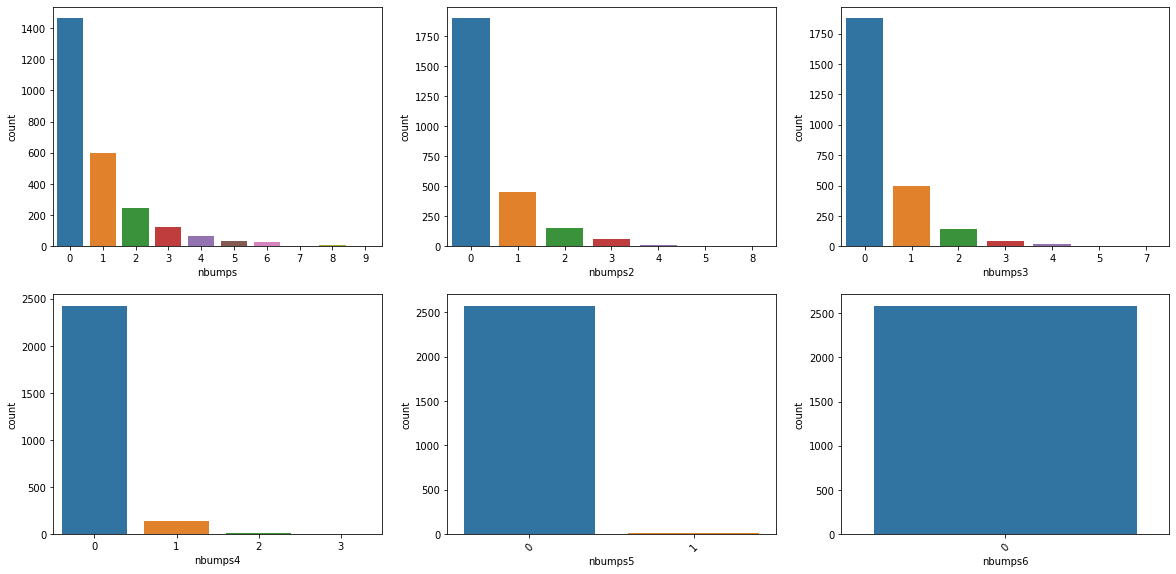

In [20]:
bumps=['nbumps', 'nbumps2', 'nbumps3', 'nbumps4',
       'nbumps5']
fig =plt.subplots(figsize=(20, 15))
fig_dims = (3, 3)

ax = plt.subplot2grid(fig_dims, (0, 0))
sns.countplot(x="nbumps", data=data)
ax = plt.subplot2grid(fig_dims, (0, 1))
sns.countplot(x="nbumps2", data=data)
ax = plt.subplot2grid(fig_dims, (0, 2))
sns.countplot(x="nbumps3", data=data)

ax = plt.subplot2grid(fig_dims, (1, 0))
sns.countplot(x="nbumps4", data=data)
ax = plt.subplot2grid(fig_dims, (1, 1))
sns.countplot(x="nbumps5", data=data)
plt.xticks(rotation=45)
ax = plt.subplot2grid(fig_dims, (1, 2))
sns.countplot(x="nbumps6", data=data)

plt.xticks(rotation=45)
plt.show()
#returns graphics of how much bumps there are for the columns nbump6,7,89--> in this case 0.

The columns ('nbumps6','nbumps7', 'nbumps89') have only zero values --> these columns are unimodal(have only one value)

In [21]:
data.drop(['nbumps6','nbumps7', 'nbumps89'], axis=1, inplace=True)

In [22]:
data.head()

,seismic,seismoacoustic,shift,genergy,gpuls,gdenergy,gdpuls,hazard,nbumps,nbumps2,nbumps3,nbumps4,nbumps5,energy,maxenergy,class
0,a,a,N,15180,48,-72,-72,a,0,0,0,0,0,0,0,0
1,a,a,N,14720,33,-70,-79,a,1,0,1,0,0,2000,2000,0
2,a,a,N,8050,30,-81,-78,a,0,0,0,0,0,0,0,0
3,a,a,N,28820,171,-23,40,a,1,0,1,0,0,3000,3000,0
4,a,a,N,12640,57,-63,-52,a,0,0,0,0,0,0,0,0


In [23]:
#datashifthazard= data.loc[(data['shift'] == 1) & (data['hazard'] > 1)] #turno di preparazione non c'è molta pericolosità (bassa)
#datashifthazard2= data.loc[(data['shift'] == 0) & (data['hazard'] > 1)]
#datashifthazard2.shape

### Indagine su dipendenza temporale tra le osservazioni

In [24]:
"""newdata = data[(data['class'] == 1) & ((data['nbumps4']>=1) | (data['nbumps5']>=1))]
newdata
"""

"newdata = data[(data['class'] == 1) & ((data['nbumps4']>=1) | (data['nbumps5']>=1))]\nnewdata\n"

In [25]:
"""newdata_class = data[(data['class'] == 1)] 
newdata_bumps = data[((data['nbumps4'] > 0) | (data['nbumps5'] > 0))]
newdata_class
#return two tables in which we want to understand if in the next shift, with class=1, there is an energy > 10^4
"""

"newdata_class = data[(data['class'] == 1)] \nnewdata_bumps = data[((data['nbumps4'] > 0) | (data['nbumps5'] > 0))]\nnewdata_class\n#return two tables in which we want to understand if in the next shift, with class=1, there is an energy > 10^4\n"

In [26]:
#newdata_bumps

In [27]:
"""result = newdata_class.append(newdata_bumps, ignore_index=False, sort=True)
result
#return a table with the two tables joined
new=result.sort_index()
new.duplicated().sum() #deletes duplicates
nd=new.drop_duplicates()
nd
"""

'result = newdata_class.append(newdata_bumps, ignore_index=False, sort=True)\nresult\n#return a table with the two tables joined\nnew=result.sort_index()\nnew.duplicated().sum() #deletes duplicates\nnd=new.drop_duplicates()\nnd\n'

# Data Visualization

### Categorical Attributes

In [28]:
col_list_categorical = ['seismic', 'seismoacoustic', 'shift', 'hazard']
col_list_continuous = ['genergy', 'gpuls', 'gdenergy', 'gdpuls', 'energy', 'maxenergy']
col_list_numerical = ['nbumps', 'nbumps2', 'nbumps3', 'nbumps4', 'nbumps5']

Text(0, 0.5, 'Count')

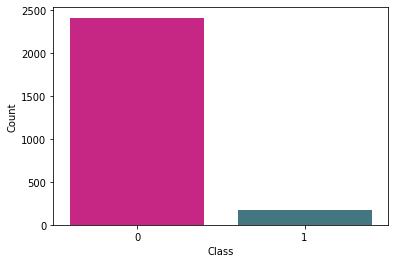

In [29]:
label = data['class']
color = ['#e10b89','#3a7d8b']
sns.countplot(x=label, data= data.iloc[:,:-1], palette=color)
plt.xlabel('Class')
plt.ylabel('Count')
#Distribution of target variable

In [30]:
label.value_counts()
#returns the number of occurences for class 1 and 0

0    2414
1     170
Name: class, dtype: int64

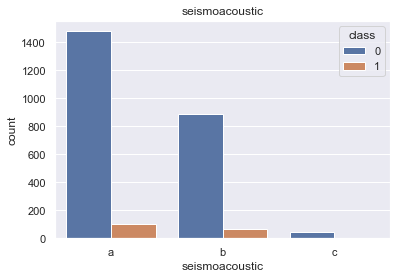

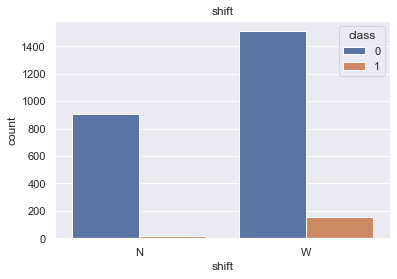

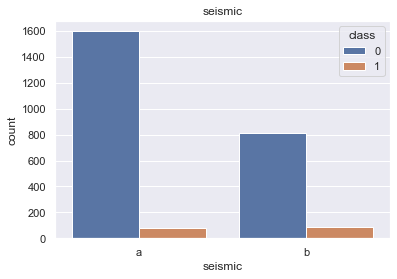

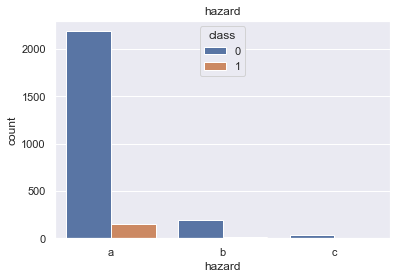

In [31]:
sns.set()
color = sns.color_palette()
col2analyze= ['seismoacoustic', 'shift', 'seismic', 'hazard']

def without_hue(plot, feature):
    total = len(feature)
    for p in ax.patches:
        percentage = '{:.1f}%'.format(100 * p.get_height()/total)
        x = p.get_x() + p.get_width() / 2 - 0.05
        y = p.get_y() + p.get_height()
        ax.annotate(percentage, (x, y), size = 12)
    plt.show()

without_hue(ax,col2analyze) #parametri: plot e percentuale richiesta

for col in col2analyze:
    sns.countplot(x=col, data=data, hue='class', palette = color)
    plt.title(col)
    plt.show()

#returns graphs with the distribution of the categorical attributes based on the two value of the class.

In [32]:
for col in col2analyze:
    data_crosstab= pd.crosstab(data[col], data['class'], colnames=['class'])
    print(data_crosstab)
    print('--------------------------')

class              0    1
seismoacoustic           
a               1479  101
b                890   66
c                 45    3
--------------------------
class     0    1
shift           
N       904   17
W      1510  153
--------------------------
class       0   1
seismic          
a        1599  83
b         815  87
--------------------------
class      0    1
hazard           
a       2186  156
b        198   14
c         30    0
--------------------------


In [33]:
pd.DataFrame(data.seismic.value_counts())

,seismic
a,1682
b,902


In [34]:
pd.DataFrame(data.seismoacoustic.value_counts())

,seismoacoustic
a,1580
b,956
c,48


In [35]:
pd.DataFrame(data.hazard.value_counts())

,hazard
a,2342
b,212
c,30


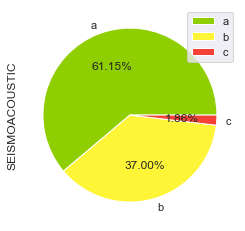

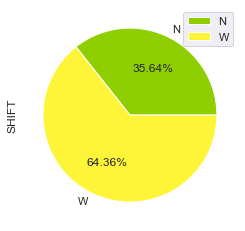

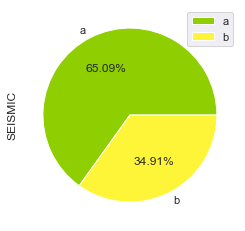

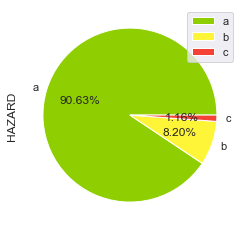

In [36]:
colors = ['#8fce00','#fff538','#f44336']
col2analyze= ['seismoacoustic', 'shift', 'seismic', 'hazard']

for col in col2analyze:
    data.groupby(col).size().plot(kind='pie', autopct='%1.2f%%', ylabel=col.upper(), legend=col, colors=colors)
    plt.show()


### Numeric Attributes

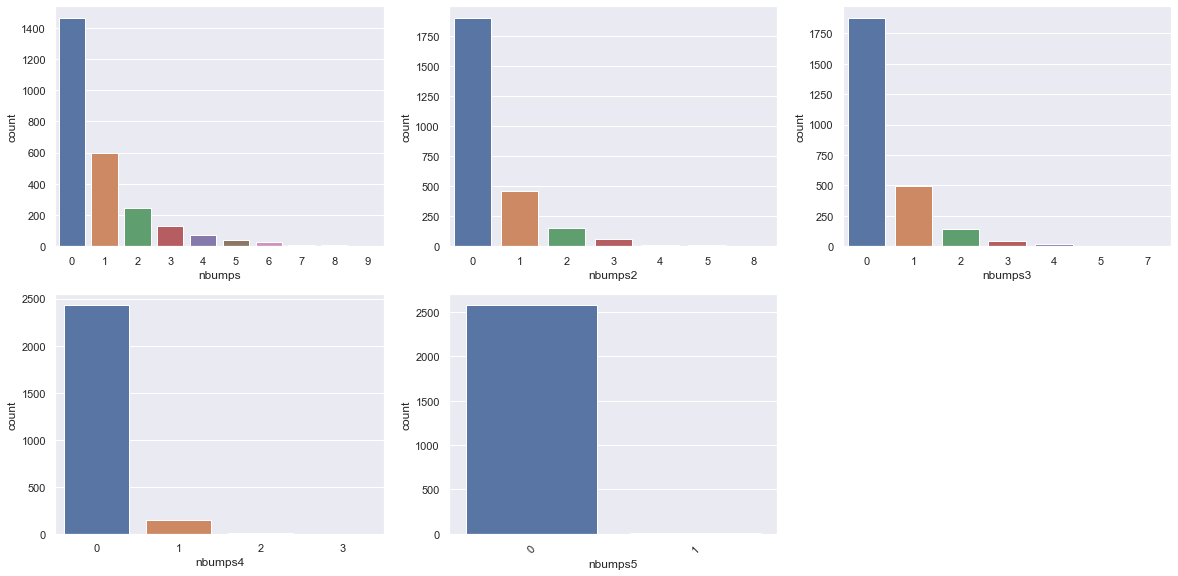

In [37]:
bumps=['nbumps', 'nbumps2', 'nbumps3', 'nbumps4',
       'nbumps5']
fig =plt.subplots(figsize=(20, 15))
fig_dims = (3, 3)

ax = plt.subplot2grid(fig_dims, (0, 0))
sns.countplot(x="nbumps", data=data)
ax = plt.subplot2grid(fig_dims, (0, 1))
sns.countplot(x="nbumps2", data=data)
ax = plt.subplot2grid(fig_dims, (0, 2))
sns.countplot(x="nbumps3", data=data)

ax = plt.subplot2grid(fig_dims, (1, 0))
sns.countplot(x="nbumps4", data=data)
ax = plt.subplot2grid(fig_dims, (1, 1))
sns.countplot(x="nbumps5", data=data)
plt.xticks(rotation=45)

plt.show()
#plot to visualize the distribution of nmbumpN variables

<AxesSubplot:xlabel='genergy', ylabel='Density'>

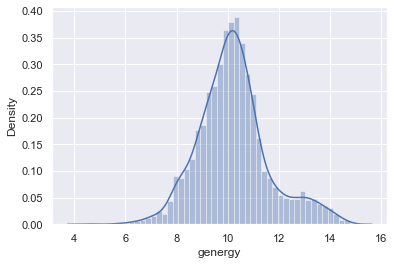

In [38]:
sns.distplot(np.log(data['genergy']), hist=True)
#distribution of genergy in logaritmic scale 

<AxesSubplot:xlabel='genergy', ylabel='Density'>

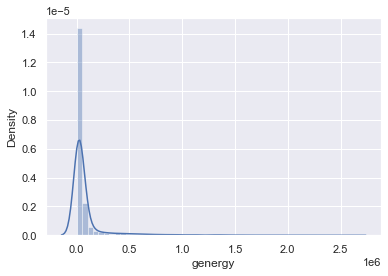

In [39]:
sns.distplot(data['genergy'], hist=True)
#distribution of genergy 

<AxesSubplot:xlabel='gdenergy', ylabel='Density'>

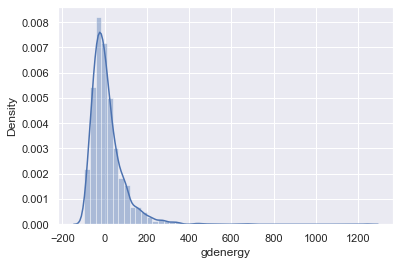

In [40]:
sns.distplot((data['gdenergy']), hist=True)
#distribution of gdenergy 

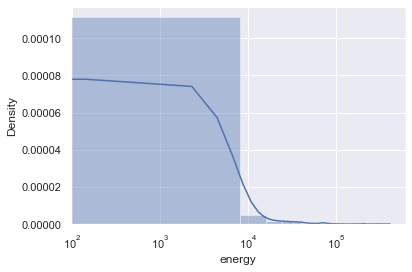

In [41]:
sn2= sns.distplot((data['energy']), hist=True)
sn2.set_xscale('log')
#distribution of energy in logaritmic scale

<AxesSubplot:xlabel='maxenergy', ylabel='Density'>

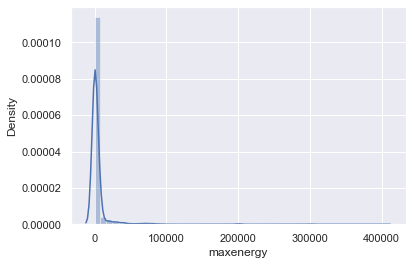

In [42]:
sns.distplot(data['maxenergy'], hist=True)
#distribution of maxgenergy

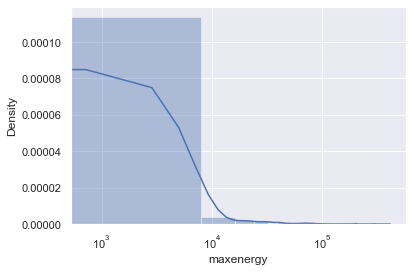

In [43]:
sn= sns.distplot(data['maxenergy'], hist=True)
sn.set_xscale('log')
#distribution of maxgenergy in logaritmic scale

<AxesSubplot:xlabel='gdpuls', ylabel='Density'>

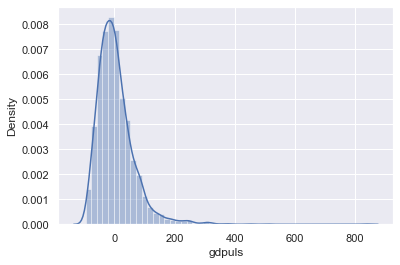

In [44]:
sns.distplot(data['gdpuls'], hist=True)
#distribution of gdpulse

# Correlation Analysis

In [45]:
data['energy'].corr(data['maxenergy'])
#correlation between energy and maxenergy -> 98%

0.9895466246651212

In [46]:
data['energy'].corr(data['class'])
#correlation between energy and class -> 5%

0.05843085986597405

In [47]:
col= ['genergy', 'gpuls', 'gdenergy','gdpuls', 'nbumps', 'nbumps2', 'nbumps3', 'nbumps4','nbumps5', 'energy', 'maxenergy']
datanumerico= data[col]

(array([ 0.5,  1.5,  2.5,  3.5,  4.5,  5.5,  6.5,  7.5,  8.5,  9.5, 10.5]),
 [Text(0, 0.5, 'genergy'),
  Text(0, 1.5, 'gpuls'),
  Text(0, 2.5, 'gdenergy'),
  Text(0, 3.5, 'gdpuls'),
  Text(0, 4.5, 'nbumps'),
  Text(0, 5.5, 'nbumps2'),
  Text(0, 6.5, 'nbumps3'),
  Text(0, 7.5, 'nbumps4'),
  Text(0, 8.5, 'nbumps5'),
  Text(0, 9.5, 'energy'),
  Text(0, 10.5, 'maxenergy')])

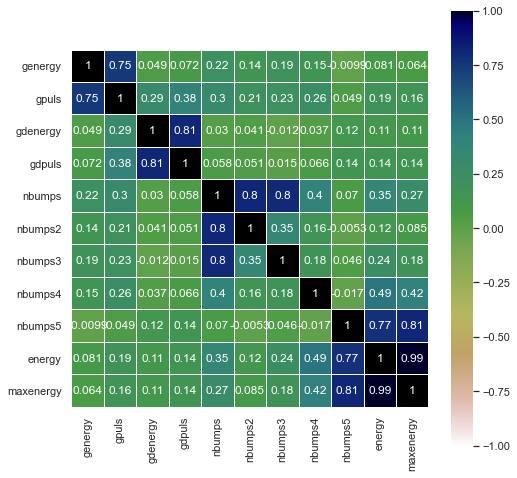

In [48]:
data_corr = datanumerico.corr()
plt.figure(figsize=[8, 8])
sns.heatmap(data=data_corr, vmin=-1, vmax=1, cmap='gist_earth_r', annot=True, square=True, linewidths=1)
plt.xticks(rotation=90)
plt.yticks(rotation=0)

<AxesSubplot:>

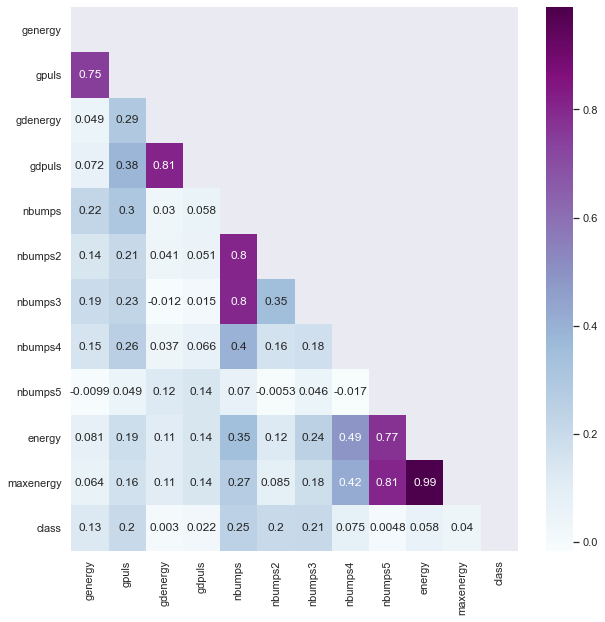

In [49]:
corr= data.corr()
matrix = np.triu(corr)
plt.figure(figsize=[10, 10])
sns.heatmap(corr, annot=True,mask=matrix,cmap='BuPu')

In [50]:
data.drop(["maxenergy"], axis=1)

,seismic,seismoacoustic,shift,genergy,gpuls,gdenergy,gdpuls,hazard,nbumps,nbumps2,nbumps3,nbumps4,nbumps5,energy,class
0,a,a,N,15180,48,-72,-72,a,0,0,0,0,0,0,0
1,a,a,N,14720,33,-70,-79,a,1,0,1,0,0,2000,0
2,a,a,N,8050,30,-81,-78,a,0,0,0,0,0,0,0
3,a,a,N,28820,171,-23,40,a,1,0,1,0,0,3000,0
4,a,a,N,12640,57,-63,-52,a,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2579,b,a,W,81410,785,432,151,b,0,0,0,0,0,0,0
2580,b,a,W,42110,555,213,118,a,0,0,0,0,0,0,0
2581,b,a,W,26960,540,101,112,a,0,0,0,0,0,0,0
2582,a,a,W,16130,322,2,2,a,0,0,0,0,0,0,0


**Notiamo che c'è una correlazione quasi perfetta tra energy e maxenergy ciò implica che la distribuzione delle tue features è molto simile. anche gdenergy e gdpuls sono fortemente correlati.

# Outliers Analysis 


[Text(0.5, 0, "('genergy', 'gpuls', 'gdenergy', 'gdpuls', 'energy', 'maxenergy')")]

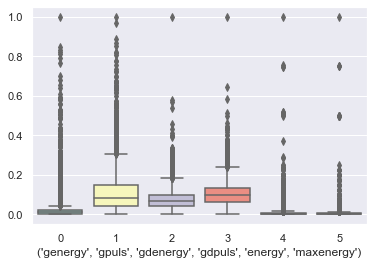

In [51]:
col_list_continuous = ['genergy', 'gpuls', 'gdenergy', 'gdpuls', 'energy', 'maxenergy']
from sklearn import preprocessing

x = data[col_list_continuous].values #returns a numpy array
min_max_scaler = preprocessing.MinMaxScaler()
x_scaled = min_max_scaler.fit_transform(x)
df = pd.DataFrame(x_scaled)

sns.boxplot(data=df, palette="Set3").set(xlabel=('genergy', 'gpuls', 'gdenergy', 'gdpuls', 'energy', 'maxenergy'))

In [52]:
data.drop(data[(data['class'] == 0 ) & (data['energy'] > 100000)].index, inplace=True)
#For class 1, occurrences that have an energy value greater than 100000 are null, so tuples with class = 0 
#were eliminated because they were considered as outliers not relevant to the analysis.

In [53]:
data.shape
#2584--> 2571 (12 rows dropped)

(2571, 16)

In [54]:
data.drop(data[(data['class'] == 0 ) & (data['maxenergy'] > 100000)].index, inplace=True)
#The same thing has been done for maxenergy

<AxesSubplot:>

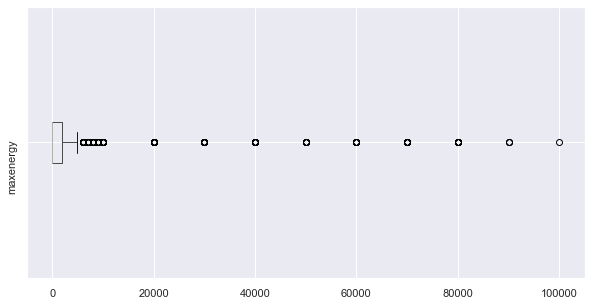

In [55]:
data.boxplot(column=['maxenergy'], rot=90, vert=False, figsize=(10,5))

<AxesSubplot:>

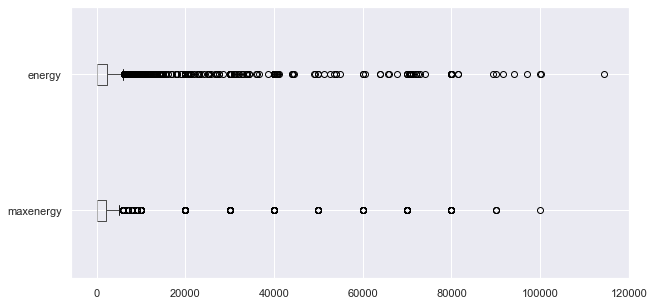

In [56]:
data.boxplot(column=['maxenergy', 'energy'], rot=0, vert=False, figsize=(10,5))

In [57]:
data.drop(data[(data['class'] == 0 ) & (data['genergy'] > 1800000)].index, inplace=True)
data.shape

(2563, 16)

<AxesSubplot:>

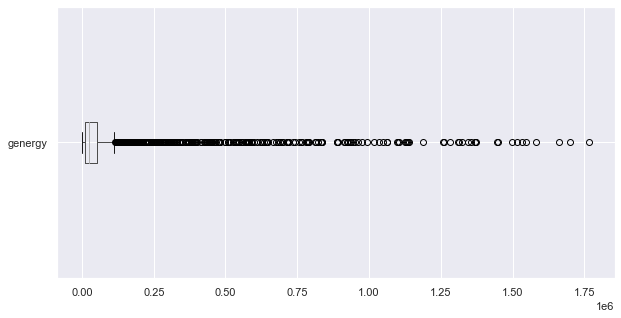

In [58]:
data.boxplot(column=['genergy'], rot=0, vert=False, figsize=(10,5))

"data.boxplot(column=['genergy'], figsize=(15,5), vert=False)\nplt.plot()"

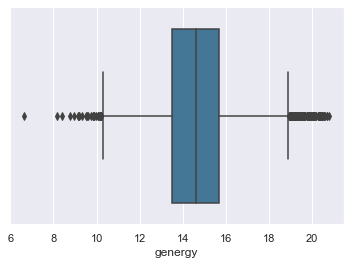

In [59]:
datalog=np.log2(data['genergy'])
sns.boxplot(x=datalog, y=None, data=datalog, orient=None, color=None, palette='mako')
#a way to visualize the boxplot in a better way
"""data.boxplot(column=['genergy'], figsize=(15,5), vert=False)
plt.plot()"""

# Other plots 


<AxesSubplot:xlabel='seismic', ylabel='nbumps'>

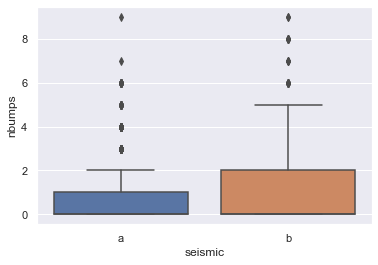

In [60]:
sns.boxplot(x=data.seismic, y=data.nbumps)
#we can also do sns.boxplot(x='seismic', y='nbumps', data = data)
#understanding part: we can see that the median of the bumps is 0
#we definitely have for low hazards shifts the 3rd quartile of 2 
#with some values that reaches 5 (but we don't know how many) 
#in the no hazard class we have an outlier of 8 nbumps

<AxesSubplot:xlabel='hazard'>

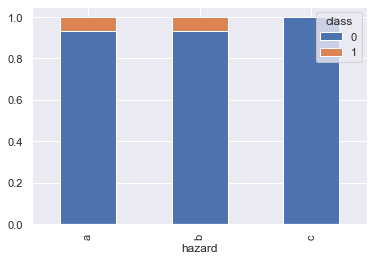

In [61]:
df_plot = data['class'].groupby(data['hazard']).value_counts(normalize=True).unstack(1)
df_plot.plot(kind='bar', stacked=True)
#we look distribution of the variable class in each value of hazard feature

<AxesSubplot:xlabel='seismic'>

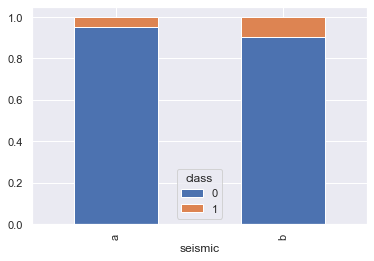

In [62]:
df_plot = data['class'].groupby(data['seismic']).value_counts(normalize=True).unstack(1)
df_plot.plot(kind='bar', stacked=True)

<AxesSubplot:ylabel='Density'>

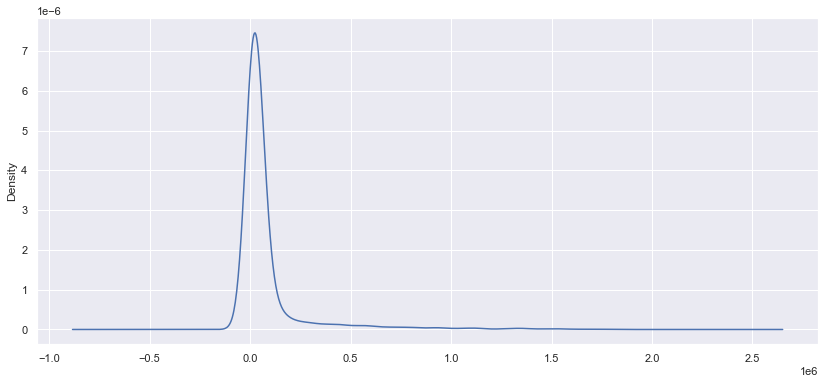

In [63]:
#density plot
#A density plot is a representation of the distribution of a numeric variable.
data['genergy'].plot(kind='density', figsize=(14,6))

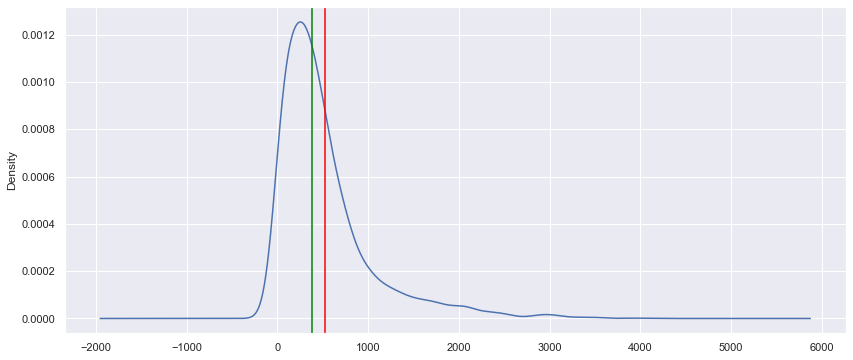

In [64]:
ax= data['gpuls'].plot(kind='density',  figsize=(14,6))
ax.axvline(data['gpuls'].mean(), color='red')
ax.axvline(data['gpuls'].median(), color='green')

# Scatter plot

<AxesSubplot:xlabel='energy', ylabel='maxenergy'>

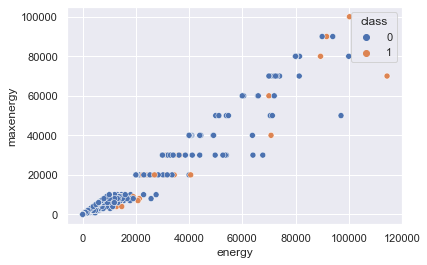

In [65]:
#Il grafico di dispersione può' essere utile per visualizzare il grado di correlazione (cioè di dipendenza lineare)
#tra le due variabili. Un grafico a dispersione può suggerire vari tipi di correlazione tra variabili con un certo 
#intervallo di confidenza. Le correlazioni possono essere positive, negative o nulle.
#Se il modello di punti sul grafico scende dall'alto a sinistra verso il basso a destra,
#suggerisce una correlazione negativa.

# vedi su seaborn lo scatterplot con hue = class
sns.scatterplot(x='energy', y='maxenergy', hue='class', data=data)

<AxesSubplot:xlabel='nbumps5', ylabel='maxenergy'>

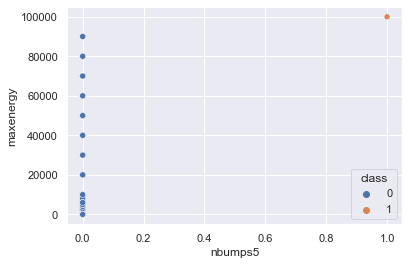

In [66]:
sns.scatterplot(x='nbumps5', y='maxenergy', hue='class', data=data)

<AxesSubplot:xlabel='genergy', ylabel='gpuls'>

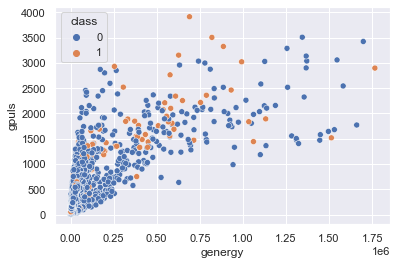

In [67]:
sns.scatterplot(x='genergy', y='gpuls', hue='class', data=data)

<AxesSubplot:xlabel='maxenergy', ylabel='nbumps5'>

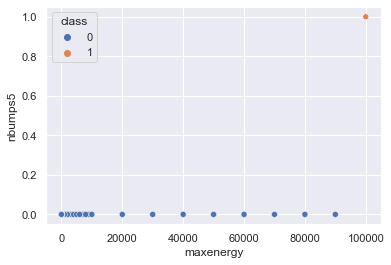

In [68]:
sns.scatterplot(x='maxenergy', y='nbumps5', hue='class', data=data)

<AxesSubplot:xlabel='genergy', ylabel='gpuls'>

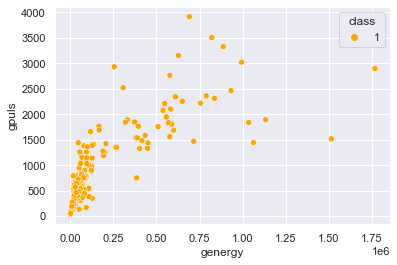

In [69]:
palette=['orange']
prova1=data[data["class"]==1]
sns.scatterplot(x='genergy', y='gpuls', hue='class', data=prova1, palette=palette)

<AxesSubplot:xlabel='energy', ylabel='genergy'>

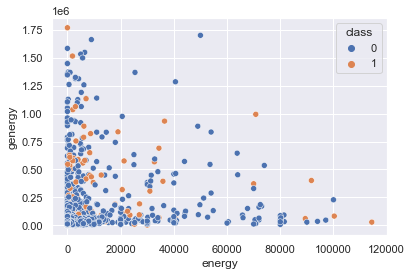

In [70]:
sns.scatterplot(x='energy', y='genergy', hue='class', data=data)

# Histogram

<AxesSubplot:xlabel='nbumps', ylabel='Count'>

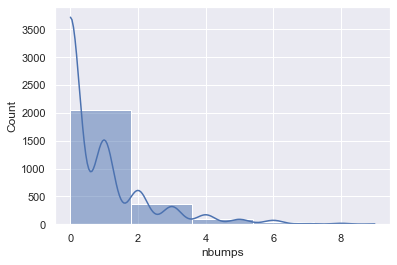

In [71]:
sns.histplot(x = data.nbumps, kde = True, bins = 5)

# Clustering


In [72]:
from sklearn.cluster import KMeans, DBSCAN, AgglomerativeClustering
#Hierarchical, K-means, dbscan
from sklearn.neighbors import NearestNeighbors 
from sklearn.metrics import silhouette_score
#Evaluation
from sklearn.preprocessing import StandardScaler, RobustScaler, MinMaxScaler
#Normalizing data
from yellowbrick.cluster import KElbowVisualizer
from yellowbrick.cluster import SilhouetteVisualizer
from scipy.spatial.distance import pdist, squareform
#Distance matrix (in DBSCAN & hierachical clustering)
from scipy.cluster.hierarchy import linkage, dendrogram as shc
#For creating dendrogram

# KMeans

In [73]:
features_selected=['genergy', 'gpuls','gdenergy','gdpuls','nbumps','nbumps2','nbumps3','nbumps4','nbumps5','energy']
#creo una lista con solo le variabili numeriche

In [74]:
df_filter= data[features_selected]
dftarget= data['class']  #mi salvo la feature class nella variabile dftarget 

In [75]:
dftarget

0       0
1       0
2       0
3       0
4       0
       ..
2579    0
2580    0
2581    0
2582    0
2583    0
Name: class, Length: 2563, dtype: int64

In [76]:
# normalize
scaler = RobustScaler()  # perform a robust scaler transform of the dataset
X = scaler.fit_transform(df_filter)   #trasformo il dataset in un array

#Robust Scaler algorithms scale features that are robust to outliers.
#The method it follows is almost similar to the MinMax Scaler but it uses the interquartile range 
#(rather than the min-max used in MinMax Scaler). 
#The median and scales of the data are removed by this scaling algorithm according to the quantile range.

In [77]:
X

array([[-0.25241038, -0.69417989, -0.89189189, ...,  0.        ,
         0.        ,  0.        ],
       [-0.26378245, -0.72592593, -0.86486486, ...,  0.        ,
         0.        ,  0.85106383],
       [-0.42867738, -0.73227513, -1.01351351, ...,  0.        ,
         0.        ,  0.        ],
       ...,
       [ 0.03881335,  0.34708995,  1.44594595, ...,  0.        ,
         0.        ,  0.        ],
       [-0.2289246 , -0.11428571,  0.10810811, ...,  0.        ,
         0.        ,  0.        ],
       [-0.31248455, -0.2984127 , -0.05405405, ...,  0.        ,
         0.        ,  0.        ]])

Find an optimal k

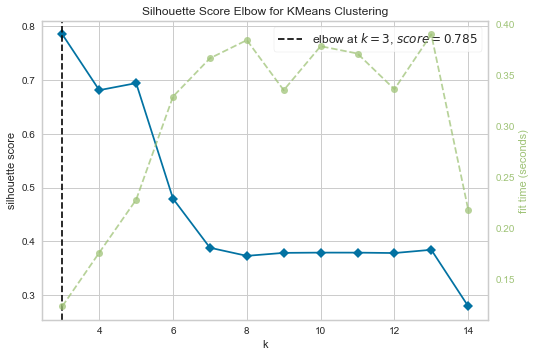

<AxesSubplot:title={'center':'Silhouette Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='silhouette score'>

In [78]:
model= KMeans()
visualizer = KElbowVisualizer(model, k=(3,15), metric='silhouette') #Instantiate the clustering model and visualizer
#The KElbowVisualizer implements the “elbow” method to help data scientists select the optimal number of clusters by fitting the model with a range of values for K. If the line chart resembles an arm,
#then the “elbow” (the point of inflection on the curve) is a good indication that 
#the underlying model fits best at that point. In the visualizer “elbow” will be annotated with a dashed line.
visualizer.fit(X)        # Fit the data to the visualizer
visualizer.show()        # Finalize and render the figure


In [79]:
for k in range(3,15):
    model = KMeans(n_clusters=k, max_iter=100)
    model.fit(X)
    print(f'K = {k} | SSE: {model.inertia_} | Silohuette: {silhouette_score(X, model.labels_)}')
    
#è evidente che essendo il valore della Silohuette: 0.785139484163175 il più grande, allora è perfetto k=3

K = 3 | SSE: 45436.851367406816 | Silohuette: 0.785139484163175
K = 4 | SSE: 36448.71825219691 | Silohuette: 0.6813014909434864
K = 5 | SSE: 29256.89580836521 | Silohuette: 0.6905889105264433
K = 6 | SSE: 24851.097790431537 | Silohuette: 0.47917730936363007
K = 7 | SSE: 22276.650563687494 | Silohuette: 0.38660724877825287
K = 8 | SSE: 19920.29307325292 | Silohuette: 0.373207265728255
K = 9 | SSE: 17779.2760767582 | Silohuette: 0.3803205137720425
K = 10 | SSE: 16534.745797596555 | Silohuette: 0.3782809076214168
K = 11 | SSE: 15493.864937692577 | Silohuette: 0.38641481386560117
K = 12 | SSE: 14558.974519596715 | Silohuette: 0.38409497105830986
K = 13 | SSE: 13798.428714561755 | Silohuette: 0.3791121870381678
K = 14 | SSE: 12934.111933484099 | Silohuette: 0.28830664567240094


Running K-Means with a range of k

In [80]:
sum_of_squared_distances = []
K = range(2,15)
for k in K:
    kmeanModel = KMeans(n_clusters=k)
    kmeanModel.fit(X)
    sum_of_squared_distances.append(kmeanModel.inertia_)

Plotting the distortions of K-Means

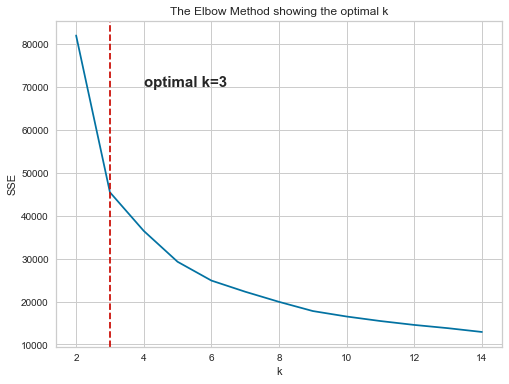

In [81]:
plt.figure(figsize=(8,6))
plt.plot(K, sum_of_squared_distances)
plt.axvline(x=3, color='r', linestyle= '--')
plt.text(x=4, y=70000, s='optimal k=3', weight= 'bold', fontsize=15)
plt.xlabel('k')
plt.ylabel('SSE')
plt.title('The Elbow Method showing the optimal k')
plt.show()

In [82]:
kmeanModel = KMeans(n_clusters=3)
kmeanModel.fit(X)

#creo i clusters

KMeans(n_clusters=3)

In [83]:
kmeanModel.labels_ #mappa per ogni riga, il record in che cluster sta

array([0, 0, 0, ..., 0, 0, 0])

In [84]:
col= df_filter.columns

In [85]:
normdf= pd.DataFrame(X, columns= col)  #l'array X (normalizzato) lo faccio diventare un dataset e lo accorpo alle colonne del dataset originale 

In [86]:
normdf

,genergy,gpuls,gdenergy,gdpuls,nbumps,nbumps2,nbumps3,nbumps4,nbumps5,energy
0,-0.252410,-0.694180,-0.891892,-0.985075,0.0,0.0,0.0,0.0,0.0,0.000000
1,-0.263782,-0.725926,-0.864865,-1.089552,1.0,0.0,1.0,0.0,0.0,0.851064
2,-0.428677,-0.732275,-1.013514,-1.074627,0.0,0.0,0.0,0.0,0.0,0.000000
3,0.084796,-0.433862,-0.229730,0.686567,1.0,0.0,1.0,0.0,0.0,1.276596
4,-0.315204,-0.675132,-0.770270,-0.686567,0.0,0.0,0.0,0.0,0.0,0.000000
...,...,...,...,...,...,...,...,...,...,...
2558,1.384920,0.865608,5.918919,2.343284,0.0,0.0,0.0,0.0,0.0,0.000000
2559,0.413350,0.378836,2.959459,1.850746,0.0,0.0,0.0,0.0,0.0,0.000000
2560,0.038813,0.347090,1.445946,1.761194,0.0,0.0,0.0,0.0,0.0,0.000000
2561,-0.228925,-0.114286,0.108108,0.119403,0.0,0.0,0.0,0.0,0.0,0.000000


In [87]:
normdf['clusterlabel']= kmeanModel.labels_ #aggiungo una nuova colonna al dataset normalizzato 
# --> ad ogni riga corrisponde un cluster (indicato nella clusterlabel)

In [88]:
normdf

,genergy,gpuls,gdenergy,gdpuls,nbumps,nbumps2,nbumps3,nbumps4,nbumps5,energy,clusterlabel
0,-0.252410,-0.694180,-0.891892,-0.985075,0.0,0.0,0.0,0.0,0.0,0.000000,0
1,-0.263782,-0.725926,-0.864865,-1.089552,1.0,0.0,1.0,0.0,0.0,0.851064,0
2,-0.428677,-0.732275,-1.013514,-1.074627,0.0,0.0,0.0,0.0,0.0,0.000000,0
3,0.084796,-0.433862,-0.229730,0.686567,1.0,0.0,1.0,0.0,0.0,1.276596,0
4,-0.315204,-0.675132,-0.770270,-0.686567,0.0,0.0,0.0,0.0,0.0,0.000000,0
...,...,...,...,...,...,...,...,...,...,...,...
2558,1.384920,0.865608,5.918919,2.343284,0.0,0.0,0.0,0.0,0.0,0.000000,0
2559,0.413350,0.378836,2.959459,1.850746,0.0,0.0,0.0,0.0,0.0,0.000000,0
2560,0.038813,0.347090,1.445946,1.761194,0.0,0.0,0.0,0.0,0.0,0.000000,0
2561,-0.228925,-0.114286,0.108108,0.119403,0.0,0.0,0.0,0.0,0.0,0.000000,0


In [89]:
#sns.pairplot(normdf, hue='clusterlabel')  #cerco di capire quale potrebbe essere il plot più interessante
#trovo interessante energy e genergy perchè sono ben separati 

In [90]:
centers = kmeanModel.cluster_centers_

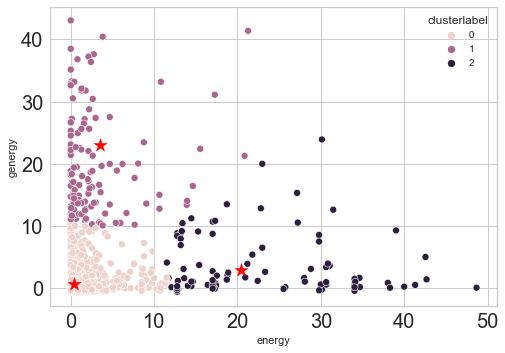

In [91]:
sns.scatterplot(x='energy', y='genergy', hue='clusterlabel', data=normdf)
plt.scatter(centers[:,0], centers[:,9], c='red', marker='*', s=200)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.show()

In [92]:
print(centers)

[[ 3.89215805e-01  1.13353307e-01  2.34186253e-01  1.30525472e-01
   7.00468683e-01  3.47251811e-01  3.33191308e-01  1.91734129e-02
  -1.02999206e-18  6.85347524e-01]
 [ 2.03968372e+01  3.40490620e+00  1.81483136e-01  2.15616134e-01
   1.95041322e+00  8.42975207e-01  9.83471074e-01  1.23966942e-01
   2.71050543e-19  2.94496219e+00]
 [ 3.52367445e+00  1.42705653e+00  3.44096728e-01  3.94972506e-01
   3.08421053e+00  9.47368421e-01  9.89473684e-01  1.13684211e+00
   1.05263158e-02  2.30947368e+01]]


In [93]:
print(centers[:,0])

[ 0.3892158  20.39683723  3.52367445]


In [94]:
print(centers[:,9])

[ 0.68534752  2.94496219 23.09473684]


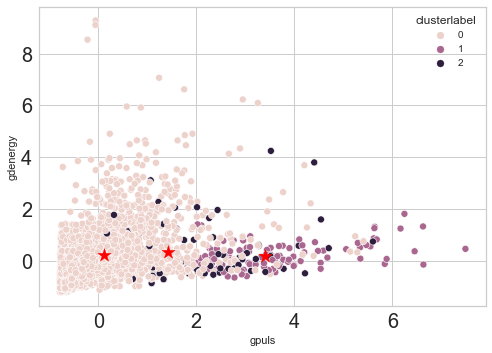

In [95]:
sns.scatterplot(x='gpuls', y='gdenergy', hue='clusterlabel', data=normdf)
plt.scatter(centers[:,1], centers[:,2], c='red', marker='*', s=200)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.show()

<AxesSubplot:xlabel='gpuls', ylabel='energy'>

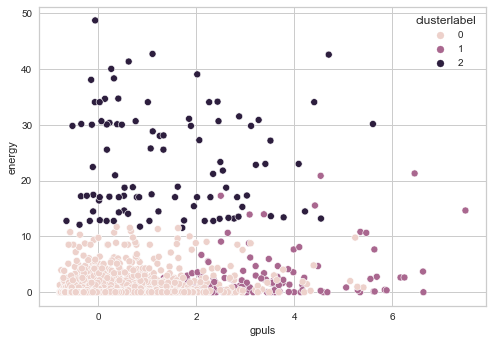

In [96]:
sns.scatterplot(x='gpuls', y='energy', hue='clusterlabel', data=normdf)

In [97]:
df_filter['class']= dftarget  #aggiungo al dataset iniziale la colonna di dftarget e la chiamo class
df_filter['clusterlabel']= kmeanModel.labels_   

In [98]:
df_filter

,genergy,gpuls,gdenergy,gdpuls,nbumps,nbumps2,nbumps3,nbumps4,nbumps5,energy,class,clusterlabel
0,15180,48,-72,-72,0,0,0,0,0,0,0,0
1,14720,33,-70,-79,1,0,1,0,0,2000,0,0
2,8050,30,-81,-78,0,0,0,0,0,0,0,0
3,28820,171,-23,40,1,0,1,0,0,3000,0,0
4,12640,57,-63,-52,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
2579,81410,785,432,151,0,0,0,0,0,0,0,0
2580,42110,555,213,118,0,0,0,0,0,0,0,0
2581,26960,540,101,112,0,0,0,0,0,0,0,0
2582,16130,322,2,2,0,0,0,0,0,0,0,0


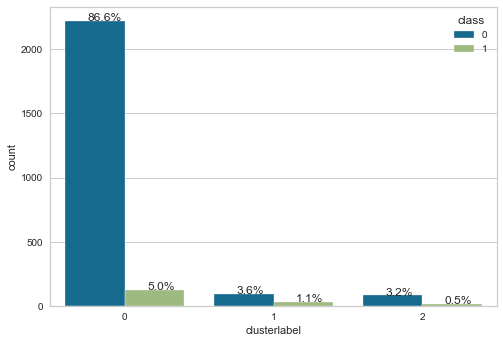

In [99]:
ax = sns.countplot(x='clusterlabel', hue='class', data=df_filter ) ##voglio vedere la distribuzione dei valori 0 ed 1 della variabile class nei cluster

def without_hue(plot, feature):
    for p in ax.patches:
        total = len(feature)
        percentage = '{:.1f}%'.format(100 * p.get_height()/total)
        x = p.get_x() + p.get_width() / 2 - 0.05
        y = p.get_y() + p.get_height()
        ax.annotate(percentage, (x, y), size = 12)
without_hue(ax,df_filter['clusterlabel'])
#parametri: plot e percentuale richiesta
#voglio vedere la distribuzione dei valori 0 ed 1 della variabile class nei cluster4



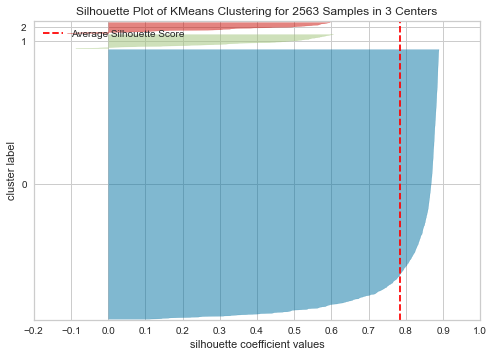

<AxesSubplot:title={'center':'Silhouette Plot of KMeans Clustering for 2563 Samples in 3 Centers'}, xlabel='silhouette coefficient values', ylabel='cluster label'>

In [100]:
# plot silhouette
visualizer = SilhouetteVisualizer(kmeanModel, colors='yellowbrick')

visualizer.fit(X)        # Fit the data to the visualizer
visualizer.show() 

#questo plot serve per capire quanto sono ben separati i cluster. Tutto ciò che va a sinistra dello 0.0 sull'asse delle x
#indica che ci sono alcuni valori che non sono stati ben distribuiti nei cluster magari perchè molto simili a quelli di un altro cluster.
#tipo alcuni records del cluster 1 sono simili a quelli di un altro cluster --> più vicini ad un altro cluster

In [101]:
df_filter['clusterlabel'].value_counts() #conta quanti valori ha ogni cluster

0    2347
1     121
2      95
Name: clusterlabel, dtype: int64

In [102]:
avg_normdf = normdf.groupby('clusterlabel').mean()
avg_normdf

,genergy,gpuls,gdenergy,gdpuls,nbumps,nbumps2,nbumps3,nbumps4,nbumps5,energy
clusterlabel,,,,,,,,,,
0,0.389216,0.113353,0.234186,0.130525,0.700469,0.347252,0.333191,0.019173,0.000000,0.685348
1,20.396837,3.404906,0.181483,0.215616,1.950413,0.842975,0.983471,0.123967,0.000000,2.944962
2,3.523674,1.427057,0.344097,0.394973,3.084211,0.947368,0.989474,1.136842,0.010526,23.094737


In [103]:
avg_normdf['clusterlabel'] = [0,1,2]

<AxesSubplot:title={'center':'Parallel Coordinates'}>

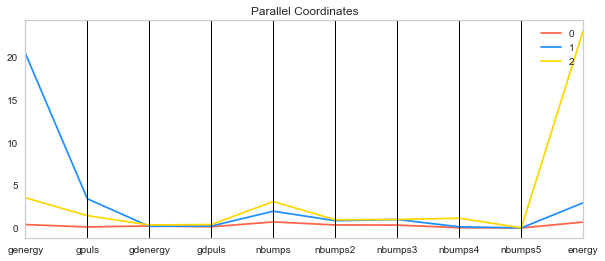

In [104]:
plt.figure(figsize=(10,4))
plt.title('Parallel Coordinates') #cambiare in normdf classlabel
pd.plotting.parallel_coordinates(avg_normdf, "clusterlabel", color= ["tomato", "dodgerblue", "gold"], alpha=1)

# DBSCAN

Calculate the average distance between each point in the data set and its 20 nearest neighbors (my selected MinPts value).

In [105]:
#After I selected my MinPts value, I used NearestNeighbors from Scikit-learn, documentation here ,
#to calculate the average distance between each point and its n_neighbors.
#I have calculated the minpts multipling 2*dim=20 (dimension is the number of columns of our dataset) 
neigh= NearestNeighbors(n_neighbors=20)
nbrs= neigh.fit(X)
distances, indices= nbrs.kneighbors(X)

Method to find the best value of epsilon. Sort distance values by ascending value and plot.

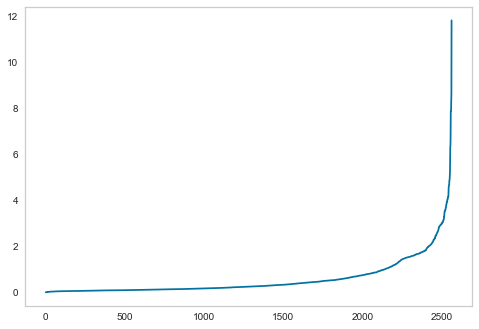

In [106]:
distances = np.sort(distances, axis=0)
distances = distances[:,1]

plt.grid()
plt.plot(distances)


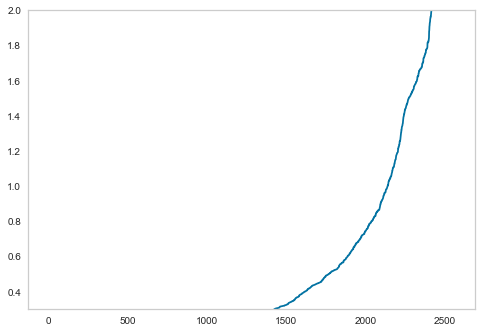

In [107]:
#### ZOOM 
plt.grid()
plt.ylim([0.3,2])
plt.plot(distances)

#lo slope(la pendenza) credo possa inizare a 1.65

In [192]:
clf = DBSCAN(eps= 1.2, min_samples=10)
clf.fit(X)

DBSCAN(eps=1.2, min_samples=10)

In [193]:
clusters = clf.labels_

In [194]:
clusters

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [195]:
normdfdbscan= pd.DataFrame(X, columns= col)

In [196]:
normdfdbscan['DBSCANclusterlabel']= clf.labels_

In [197]:
normdfdbscan

,genergy,gpuls,gdenergy,gdpuls,nbumps,nbumps2,nbumps3,nbumps4,nbumps5,energy,DBSCANclusterlabel
0,-0.252410,-0.694180,-0.891892,-0.985075,0.0,0.0,0.0,0.0,0.0,0.000000,0
1,-0.263782,-0.725926,-0.864865,-1.089552,1.0,0.0,1.0,0.0,0.0,0.851064,0
2,-0.428677,-0.732275,-1.013514,-1.074627,0.0,0.0,0.0,0.0,0.0,0.000000,0
3,0.084796,-0.433862,-0.229730,0.686567,1.0,0.0,1.0,0.0,0.0,1.276596,0
4,-0.315204,-0.675132,-0.770270,-0.686567,0.0,0.0,0.0,0.0,0.0,0.000000,0
...,...,...,...,...,...,...,...,...,...,...,...
2558,1.384920,0.865608,5.918919,2.343284,0.0,0.0,0.0,0.0,0.0,0.000000,-1
2559,0.413350,0.378836,2.959459,1.850746,0.0,0.0,0.0,0.0,0.0,0.000000,0
2560,0.038813,0.347090,1.445946,1.761194,0.0,0.0,0.0,0.0,0.0,0.000000,0
2561,-0.228925,-0.114286,0.108108,0.119403,0.0,0.0,0.0,0.0,0.0,0.000000,0


In [198]:
#sns.pairplot(normdfdbscan, hue='DBSCANclusterlabel')

<AxesSubplot:xlabel='energy', ylabel='genergy'>

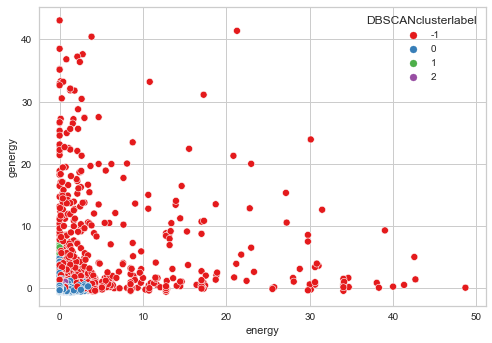

In [199]:
sns.scatterplot(x='energy', y='genergy', hue='DBSCANclusterlabel', data=normdfdbscan, palette='Set1')

In [168]:
palette=['orange']
prova=normdfdbscan[normdfdbscan["DBSCANclusterlabel"]==1]

In [169]:
prova

,genergy,gpuls,gdenergy,gdpuls,nbumps,nbumps2,nbumps3,nbumps4,nbumps5,energy,DBSCANclusterlabel
255,11.244994,4.215873,-0.486486,0.283582,2.0,0.0,1.0,1.0,0.0,14.468085,1
259,10.469963,3.779894,-0.310811,0.074627,5.0,1.0,3.0,1.0,0.0,13.404255,1
292,8.852905,2.169312,-0.486486,-0.358209,1.0,0.0,0.0,1.0,0.0,12.765957,1
296,8.774536,2.474074,-0.459459,-0.268657,4.0,1.0,2.0,1.0,0.0,13.148936,1
298,10.723609,2.831746,-0.202703,-0.074627,1.0,0.0,0.0,1.0,0.0,17.021277,1
308,8.432880,2.344974,-0.540541,-0.820896,1.0,0.0,0.0,1.0,0.0,12.765957,1
315,9.129048,2.937566,0.054054,0.208955,3.0,1.0,1.0,1.0,0.0,15.276596,1
316,10.848702,3.030688,0.297297,0.238806,2.0,1.0,0.0,1.0,0.0,17.319149,1
322,7.960692,2.768254,-0.297297,-0.238806,2.0,0.0,1.0,1.0,0.0,13.191489,1
341,8.758467,2.285714,-0.202703,-0.582090,2.0,0.0,0.0,2.0,0.0,17.021277,1


<AxesSubplot:xlabel='energy', ylabel='genergy'>

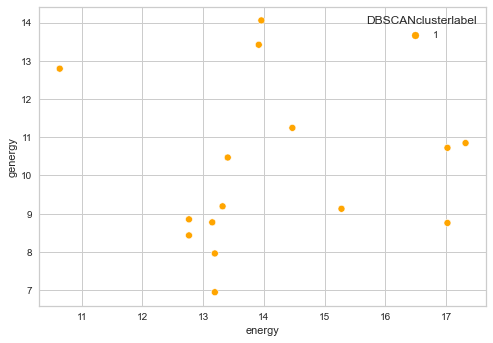

In [118]:
sns.scatterplot(x='energy', y='genergy', hue='DBSCANclusterlabel', data=prova, palette=palette)

In [172]:
df_filter1= data[features_selected]

In [173]:
df_filter1['class']= dftarget

In [174]:
df_filter1['DBSCANclusterlabel']= clf.labels_

In [175]:
df_filter1

,genergy,gpuls,gdenergy,gdpuls,nbumps,nbumps2,nbumps3,nbumps4,nbumps5,energy,class,DBSCANclusterlabel
0,15180,48,-72,-72,0,0,0,0,0,0,0,0
1,14720,33,-70,-79,1,0,1,0,0,2000,0,0
2,8050,30,-81,-78,0,0,0,0,0,0,0,0
3,28820,171,-23,40,1,0,1,0,0,3000,0,0
4,12640,57,-63,-52,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
2579,81410,785,432,151,0,0,0,0,0,0,0,0
2580,42110,555,213,118,0,0,0,0,0,0,0,0
2581,26960,540,101,112,0,0,0,0,0,0,0,0
2582,16130,322,2,2,0,0,0,0,0,0,0,0


In [176]:
df_filter1['DBSCANclusterlabel'].value_counts() #conta quanti outliers ha il cluster -1

 0    2469
-1      73
 1      11
 2      10
Name: DBSCANclusterlabel, dtype: int64

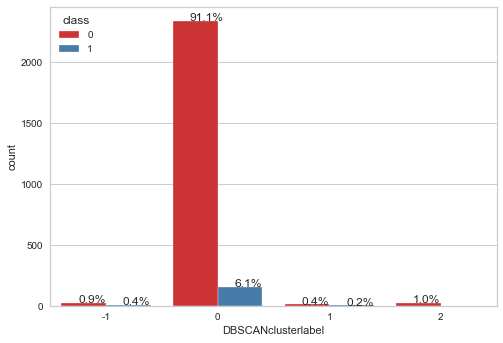

In [124]:
ax = sns.countplot(x='DBSCANclusterlabel', hue='class', data=df_filter1, palette='Set1') #voglio vedere la distribuzione dei valori 0 ed 1 della variabile class nei cluster

def without_hue(plot, feature):
    for p in ax.patches:
        total = len(feature)
        percentage = '{:.1f}%'.format(100 * p.get_height()/total)
        x = p.get_x() + p.get_width() / 2 - 0.05
        y = p.get_y() + p.get_height()
        ax.annotate(percentage, (x, y), size = 12)
without_hue(ax,df_filter1['DBSCANclusterlabel'])
#parametri: plot e percentuale richiesta
#voglio vedere la distribuzione dei valori 0 ed 1 della variabile class nei cluster4



# Hierarchical clustering

In [125]:
X

array([[-0.25241038, -0.69417989, -0.89189189, ...,  0.        ,
         0.        ,  0.        ],
       [-0.26378245, -0.72592593, -0.86486486, ...,  0.        ,
         0.        ,  0.85106383],
       [-0.42867738, -0.73227513, -1.01351351, ...,  0.        ,
         0.        ,  0.        ],
       ...,
       [ 0.03881335,  0.34708995,  1.44594595, ...,  0.        ,
         0.        ,  0.        ],
       [-0.2289246 , -0.11428571,  0.10810811, ...,  0.        ,
         0.        ,  0.        ],
       [-0.31248455, -0.2984127 , -0.05405405, ...,  0.        ,
         0.        ,  0.        ]])

In [126]:
linkage_methods = ["average", "complete", "ward", "single"]

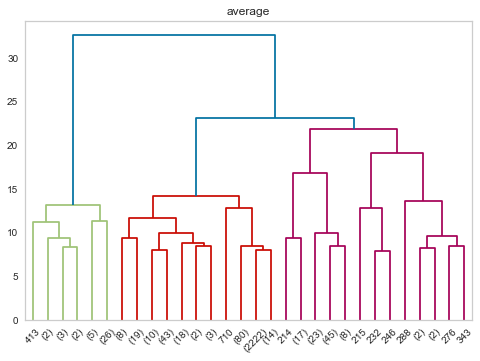

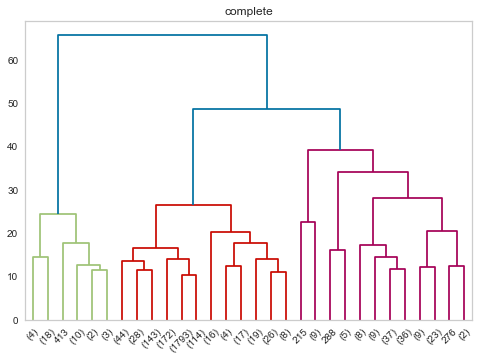

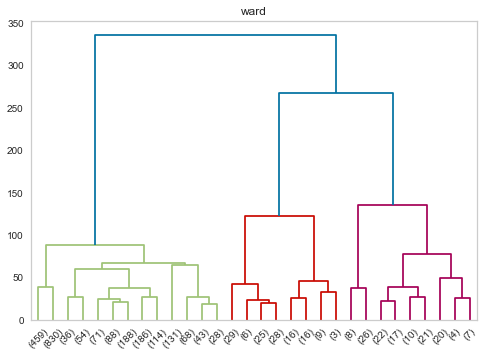

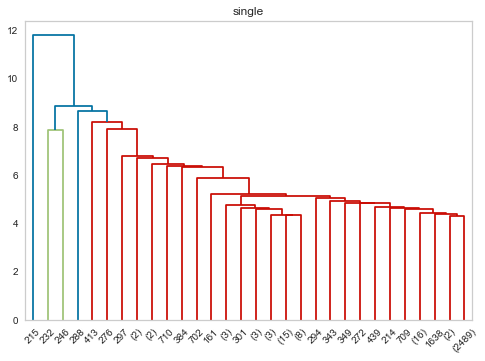

In [127]:
# Plot dendograms for each method 
for i in linkage_methods:
    data_dist = pdist(X, metric='euclidean') #Pairwise (distanza punto-punto) distances between observations in n-dimensional space.
    data_link = linkage(data_dist, method=i, metric='euclidean')
    #The dendrogram can be hard to read when the original observation matrix 
    #from which the linkage is derived is large. Truncation is used to condense the dendrogram. 
    res = shc(data_link, truncate_mode='lastp')
    plt.title(str(i))
    plt.grid()
    plt.show()

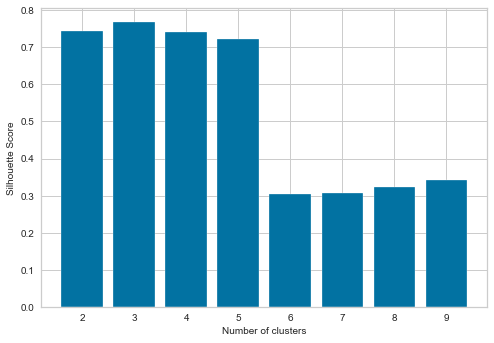

In [128]:
silhouette_scores = [] 

for n_cluster in range(2, 10):
    silhouette_scores.append( 
        silhouette_score(X, AgglomerativeClustering(n_clusters = n_cluster, ).fit_predict(X))) 
    
# Plotting a bar graph to compare the results 
k = [2, 3, 4, 5, 6, 7, 8, 9] 
plt.bar(k, silhouette_scores) 
plt.xlabel('Number of clusters', fontsize = 10) 
plt.ylabel('Silhouette Score', fontsize = 10) 
plt.show() 

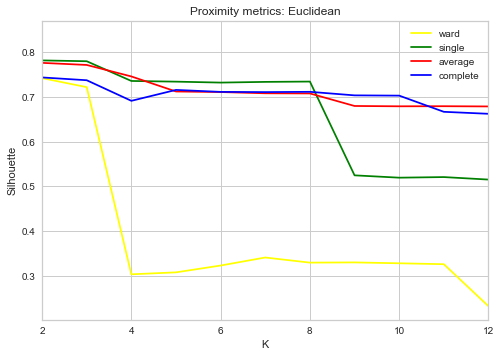

In [129]:
avg_sil = []
comp_sil = []
ward_sil = []
sing_sil = []


for method in linkage_methods:
    for k in range(2,15):
        cluster = AgglomerativeClustering(n_clusters=k, affinity='euclidean', linkage=method) 
        labels = cluster.fit_predict(X)
        sil = silhouette_score(X, labels, metric='euclidean')
        if method == "average":
            avg_sil.append(sil)
        elif method == 'complete':
            comp_sil.append(sil)
        elif method == 'ward':
            ward_sil.append(sil)
        else:
            sing_sil.append(sil)
            
fig,ax= plt.subplots()
ax.set_xlim(2,12)
plt.plot(ward_sil, color = 'yellow', label='ward')
plt.plot(sing_sil, color = 'green', label='single')
plt.plot(avg_sil, color = 'red', label='average')
plt.plot(comp_sil, color='blue', label='complete')
plt.ylabel('Silhouette')
plt.xlabel('K')
plt.title('Proximity metrics: Euclidean')
plt.legend()


In [130]:
sing_sil

[0.8394790459276196,
 0.7887583010930906,
 0.7813989102962219,
 0.7795324017566636,
 0.7354695733952286,
 0.7339631816499316,
 0.731861631476166,
 0.7334207818461804,
 0.7341459809549639,
 0.5246606486406684,
 0.5194381359213488,
 0.5207827431116245,
 0.5152053056541653]

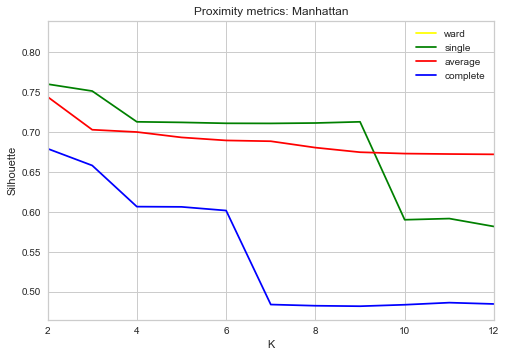

In [131]:
avg_sil = []
comp_sil = []
ward_sil = []
sing_sil = []

methods= ["average", "single", "complete"]
for method in methods:
    for k in range(2,15):
        cluster = AgglomerativeClustering(n_clusters=k, affinity='manhattan', linkage=method) 
        labels = cluster.fit_predict(X)
        sil = silhouette_score(X, labels, metric='manhattan')
        if method == "average":
            avg_sil.append(sil)
        elif method == 'complete':
            comp_sil.append(sil)
        else:
            sing_sil.append(sil)
            
fig,ax= plt.subplots()
ax.set_xlim(2,12)
plt.plot(ward_sil, color = 'yellow', label='ward')
plt.plot(sing_sil, color = 'green', label='single')
plt.plot(avg_sil, color = 'red', label='average')
plt.plot(comp_sil, color='blue', label='complete')
plt.ylabel('Silhouette')
plt.xlabel('K')
plt.title('Proximity metrics: Manhattan')
plt.legend()

Building and Visualizing clustering model for k = 3

# Complete-linkage clustering

In [132]:
cluster = AgglomerativeClustering(n_clusters=3, affinity='euclidean', linkage='complete')  
labels = cluster.fit_predict(X)

In [133]:
normdfhier= pd.DataFrame(X, columns= col)
normdfhier

,genergy,gpuls,gdenergy,gdpuls,nbumps,nbumps2,nbumps3,nbumps4,nbumps5,energy
0,-0.252410,-0.694180,-0.891892,-0.985075,0.0,0.0,0.0,0.0,0.0,0.000000
1,-0.263782,-0.725926,-0.864865,-1.089552,1.0,0.0,1.0,0.0,0.0,0.851064
2,-0.428677,-0.732275,-1.013514,-1.074627,0.0,0.0,0.0,0.0,0.0,0.000000
3,0.084796,-0.433862,-0.229730,0.686567,1.0,0.0,1.0,0.0,0.0,1.276596
4,-0.315204,-0.675132,-0.770270,-0.686567,0.0,0.0,0.0,0.0,0.0,0.000000
...,...,...,...,...,...,...,...,...,...,...
2558,1.384920,0.865608,5.918919,2.343284,0.0,0.0,0.0,0.0,0.0,0.000000
2559,0.413350,0.378836,2.959459,1.850746,0.0,0.0,0.0,0.0,0.0,0.000000
2560,0.038813,0.347090,1.445946,1.761194,0.0,0.0,0.0,0.0,0.0,0.000000
2561,-0.228925,-0.114286,0.108108,0.119403,0.0,0.0,0.0,0.0,0.0,0.000000


In [134]:
normdfhier['complete_cluster'] = labels
normdfhier

,genergy,gpuls,gdenergy,gdpuls,nbumps,nbumps2,nbumps3,nbumps4,nbumps5,energy,complete_cluster
0,-0.252410,-0.694180,-0.891892,-0.985075,0.0,0.0,0.0,0.0,0.0,0.000000,2
1,-0.263782,-0.725926,-0.864865,-1.089552,1.0,0.0,1.0,0.0,0.0,0.851064,2
2,-0.428677,-0.732275,-1.013514,-1.074627,0.0,0.0,0.0,0.0,0.0,0.000000,2
3,0.084796,-0.433862,-0.229730,0.686567,1.0,0.0,1.0,0.0,0.0,1.276596,2
4,-0.315204,-0.675132,-0.770270,-0.686567,0.0,0.0,0.0,0.0,0.0,0.000000,2
...,...,...,...,...,...,...,...,...,...,...,...
2558,1.384920,0.865608,5.918919,2.343284,0.0,0.0,0.0,0.0,0.0,0.000000,2
2559,0.413350,0.378836,2.959459,1.850746,0.0,0.0,0.0,0.0,0.0,0.000000,2
2560,0.038813,0.347090,1.445946,1.761194,0.0,0.0,0.0,0.0,0.0,0.000000,2
2561,-0.228925,-0.114286,0.108108,0.119403,0.0,0.0,0.0,0.0,0.0,0.000000,2


Text(0.5, 1.0, 'Complete Link clustering')

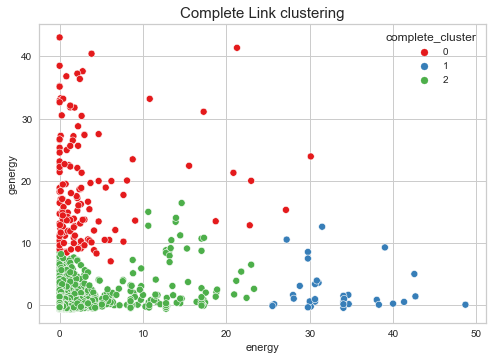

In [135]:
sns.scatterplot(x='energy', y='genergy', hue='complete_cluster', data=normdfhier, palette='Set1').set_title('Complete Link clustering', fontsize= 15)


# Average-link clustering

In [136]:
cluster = AgglomerativeClustering(n_clusters=3, affinity='euclidean', linkage='average')  
labels = cluster.fit_predict(X)

In [137]:
normdfhier= pd.DataFrame(X, columns= col)
normdfhier

,genergy,gpuls,gdenergy,gdpuls,nbumps,nbumps2,nbumps3,nbumps4,nbumps5,energy
0,-0.252410,-0.694180,-0.891892,-0.985075,0.0,0.0,0.0,0.0,0.0,0.000000
1,-0.263782,-0.725926,-0.864865,-1.089552,1.0,0.0,1.0,0.0,0.0,0.851064
2,-0.428677,-0.732275,-1.013514,-1.074627,0.0,0.0,0.0,0.0,0.0,0.000000
3,0.084796,-0.433862,-0.229730,0.686567,1.0,0.0,1.0,0.0,0.0,1.276596
4,-0.315204,-0.675132,-0.770270,-0.686567,0.0,0.0,0.0,0.0,0.0,0.000000
...,...,...,...,...,...,...,...,...,...,...
2558,1.384920,0.865608,5.918919,2.343284,0.0,0.0,0.0,0.0,0.0,0.000000
2559,0.413350,0.378836,2.959459,1.850746,0.0,0.0,0.0,0.0,0.0,0.000000
2560,0.038813,0.347090,1.445946,1.761194,0.0,0.0,0.0,0.0,0.0,0.000000
2561,-0.228925,-0.114286,0.108108,0.119403,0.0,0.0,0.0,0.0,0.0,0.000000


In [138]:
normdfhier['average_cluster'] = labels
normdfhier

,genergy,gpuls,gdenergy,gdpuls,nbumps,nbumps2,nbumps3,nbumps4,nbumps5,energy,average_cluster
0,-0.252410,-0.694180,-0.891892,-0.985075,0.0,0.0,0.0,0.0,0.0,0.000000,2
1,-0.263782,-0.725926,-0.864865,-1.089552,1.0,0.0,1.0,0.0,0.0,0.851064,2
2,-0.428677,-0.732275,-1.013514,-1.074627,0.0,0.0,0.0,0.0,0.0,0.000000,2
3,0.084796,-0.433862,-0.229730,0.686567,1.0,0.0,1.0,0.0,0.0,1.276596,2
4,-0.315204,-0.675132,-0.770270,-0.686567,0.0,0.0,0.0,0.0,0.0,0.000000,2
...,...,...,...,...,...,...,...,...,...,...,...
2558,1.384920,0.865608,5.918919,2.343284,0.0,0.0,0.0,0.0,0.0,0.000000,2
2559,0.413350,0.378836,2.959459,1.850746,0.0,0.0,0.0,0.0,0.0,0.000000,2
2560,0.038813,0.347090,1.445946,1.761194,0.0,0.0,0.0,0.0,0.0,0.000000,2
2561,-0.228925,-0.114286,0.108108,0.119403,0.0,0.0,0.0,0.0,0.0,0.000000,2


Text(0.5, 1.0, 'Complete Link clustering')

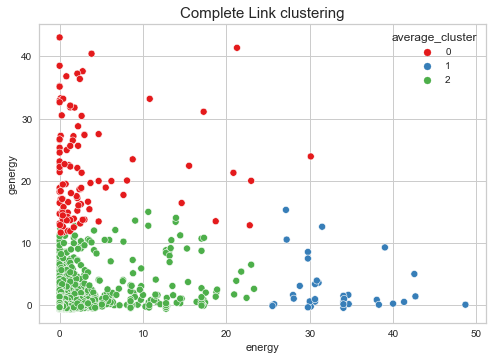

In [139]:
sns.scatterplot(x='energy', y='genergy', hue='average_cluster', data=normdfhier, palette='Set1').set_title('Complete Link clustering', fontsize= 15)


# Single Link clustering

In [140]:
cluster = AgglomerativeClustering(n_clusters=3, affinity='euclidean', linkage='single')  
labels = cluster.fit_predict(X)

In [141]:
normdfhier= pd.DataFrame(X, columns= col)
normdfhier

,genergy,gpuls,gdenergy,gdpuls,nbumps,nbumps2,nbumps3,nbumps4,nbumps5,energy
0,-0.252410,-0.694180,-0.891892,-0.985075,0.0,0.0,0.0,0.0,0.0,0.000000
1,-0.263782,-0.725926,-0.864865,-1.089552,1.0,0.0,1.0,0.0,0.0,0.851064
2,-0.428677,-0.732275,-1.013514,-1.074627,0.0,0.0,0.0,0.0,0.0,0.000000
3,0.084796,-0.433862,-0.229730,0.686567,1.0,0.0,1.0,0.0,0.0,1.276596
4,-0.315204,-0.675132,-0.770270,-0.686567,0.0,0.0,0.0,0.0,0.0,0.000000
...,...,...,...,...,...,...,...,...,...,...
2558,1.384920,0.865608,5.918919,2.343284,0.0,0.0,0.0,0.0,0.0,0.000000
2559,0.413350,0.378836,2.959459,1.850746,0.0,0.0,0.0,0.0,0.0,0.000000
2560,0.038813,0.347090,1.445946,1.761194,0.0,0.0,0.0,0.0,0.0,0.000000
2561,-0.228925,-0.114286,0.108108,0.119403,0.0,0.0,0.0,0.0,0.0,0.000000


In [142]:
normdfhier['single_cluster'] = labels
normdfhier

,genergy,gpuls,gdenergy,gdpuls,nbumps,nbumps2,nbumps3,nbumps4,nbumps5,energy,single_cluster
0,-0.252410,-0.694180,-0.891892,-0.985075,0.0,0.0,0.0,0.0,0.0,0.000000,0
1,-0.263782,-0.725926,-0.864865,-1.089552,1.0,0.0,1.0,0.0,0.0,0.851064,0
2,-0.428677,-0.732275,-1.013514,-1.074627,0.0,0.0,0.0,0.0,0.0,0.000000,0
3,0.084796,-0.433862,-0.229730,0.686567,1.0,0.0,1.0,0.0,0.0,1.276596,0
4,-0.315204,-0.675132,-0.770270,-0.686567,0.0,0.0,0.0,0.0,0.0,0.000000,0
...,...,...,...,...,...,...,...,...,...,...,...
2558,1.384920,0.865608,5.918919,2.343284,0.0,0.0,0.0,0.0,0.0,0.000000,0
2559,0.413350,0.378836,2.959459,1.850746,0.0,0.0,0.0,0.0,0.0,0.000000,0
2560,0.038813,0.347090,1.445946,1.761194,0.0,0.0,0.0,0.0,0.0,0.000000,0
2561,-0.228925,-0.114286,0.108108,0.119403,0.0,0.0,0.0,0.0,0.0,0.000000,0


Text(0.5, 1.0, 'Single Link clustering')

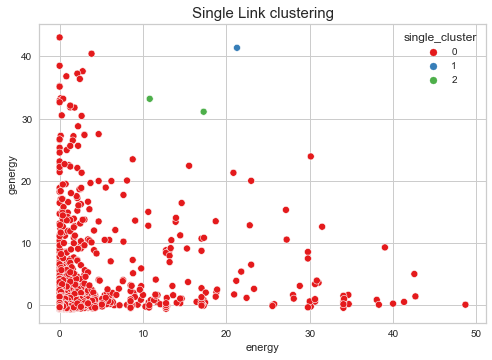

In [143]:
sns.scatterplot(x='energy', y='genergy', hue='single_cluster', data=normdfhier, palette='Set1').set_title('Single Link clustering', fontsize= 15)

In [144]:
normdfhier['single_cluster'].value_counts() 

0    2560
2       2
1       1
Name: single_cluster, dtype: int64

# Ward's Link clustering

In [145]:
cluster = AgglomerativeClustering(n_clusters=3, affinity='euclidean', linkage='ward')  
labels = cluster.fit_predict(X)

In [146]:
normdfhier= pd.DataFrame(X, columns= col)
normdfhier

,genergy,gpuls,gdenergy,gdpuls,nbumps,nbumps2,nbumps3,nbumps4,nbumps5,energy
0,-0.252410,-0.694180,-0.891892,-0.985075,0.0,0.0,0.0,0.0,0.0,0.000000
1,-0.263782,-0.725926,-0.864865,-1.089552,1.0,0.0,1.0,0.0,0.0,0.851064
2,-0.428677,-0.732275,-1.013514,-1.074627,0.0,0.0,0.0,0.0,0.0,0.000000
3,0.084796,-0.433862,-0.229730,0.686567,1.0,0.0,1.0,0.0,0.0,1.276596
4,-0.315204,-0.675132,-0.770270,-0.686567,0.0,0.0,0.0,0.0,0.0,0.000000
...,...,...,...,...,...,...,...,...,...,...
2558,1.384920,0.865608,5.918919,2.343284,0.0,0.0,0.0,0.0,0.0,0.000000
2559,0.413350,0.378836,2.959459,1.850746,0.0,0.0,0.0,0.0,0.0,0.000000
2560,0.038813,0.347090,1.445946,1.761194,0.0,0.0,0.0,0.0,0.0,0.000000
2561,-0.228925,-0.114286,0.108108,0.119403,0.0,0.0,0.0,0.0,0.0,0.000000


In [147]:
normdfhier['ward_cluster'] = labels
normdfhier

,genergy,gpuls,gdenergy,gdpuls,nbumps,nbumps2,nbumps3,nbumps4,nbumps5,energy,ward_cluster
0,-0.252410,-0.694180,-0.891892,-0.985075,0.0,0.0,0.0,0.0,0.0,0.000000,1
1,-0.263782,-0.725926,-0.864865,-1.089552,1.0,0.0,1.0,0.0,0.0,0.851064,1
2,-0.428677,-0.732275,-1.013514,-1.074627,0.0,0.0,0.0,0.0,0.0,0.000000,1
3,0.084796,-0.433862,-0.229730,0.686567,1.0,0.0,1.0,0.0,0.0,1.276596,1
4,-0.315204,-0.675132,-0.770270,-0.686567,0.0,0.0,0.0,0.0,0.0,0.000000,1
...,...,...,...,...,...,...,...,...,...,...,...
2558,1.384920,0.865608,5.918919,2.343284,0.0,0.0,0.0,0.0,0.0,0.000000,1
2559,0.413350,0.378836,2.959459,1.850746,0.0,0.0,0.0,0.0,0.0,0.000000,1
2560,0.038813,0.347090,1.445946,1.761194,0.0,0.0,0.0,0.0,0.0,0.000000,1
2561,-0.228925,-0.114286,0.108108,0.119403,0.0,0.0,0.0,0.0,0.0,0.000000,1


Text(0.5, 1.0, "Ward's Link clustering")

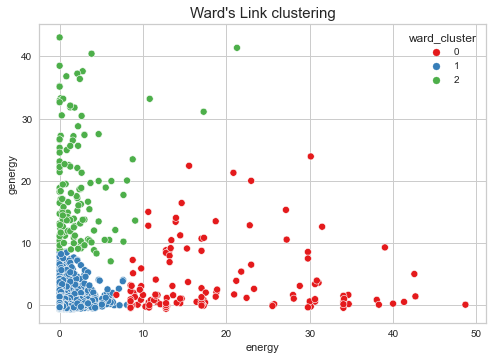

In [148]:
sns.scatterplot(x='energy', y='genergy', hue='ward_cluster', data=normdfhier, palette='Set1').set_title('Ward\'s Link clustering', fontsize= 15)

In [149]:
df_filter

,genergy,gpuls,gdenergy,gdpuls,nbumps,nbumps2,nbumps3,nbumps4,nbumps5,energy,class,clusterlabel
0,15180,48,-72,-72,0,0,0,0,0,0,0,0
1,14720,33,-70,-79,1,0,1,0,0,2000,0,0
2,8050,30,-81,-78,0,0,0,0,0,0,0,0
3,28820,171,-23,40,1,0,1,0,0,3000,0,0
4,12640,57,-63,-52,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
2579,81410,785,432,151,0,0,0,0,0,0,0,0
2580,42110,555,213,118,0,0,0,0,0,0,0,0
2581,26960,540,101,112,0,0,0,0,0,0,0,0
2582,16130,322,2,2,0,0,0,0,0,0,0,0


In [150]:
df_filter

,genergy,gpuls,gdenergy,gdpuls,nbumps,nbumps2,nbumps3,nbumps4,nbumps5,energy,class,clusterlabel
0,15180,48,-72,-72,0,0,0,0,0,0,0,0
1,14720,33,-70,-79,1,0,1,0,0,2000,0,0
2,8050,30,-81,-78,0,0,0,0,0,0,0,0
3,28820,171,-23,40,1,0,1,0,0,3000,0,0
4,12640,57,-63,-52,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
2579,81410,785,432,151,0,0,0,0,0,0,0,0
2580,42110,555,213,118,0,0,0,0,0,0,0,0
2581,26960,540,101,112,0,0,0,0,0,0,0,0
2582,16130,322,2,2,0,0,0,0,0,0,0,0


In [151]:
data

,seismic,seismoacoustic,shift,genergy,gpuls,gdenergy,gdpuls,hazard,nbumps,nbumps2,nbumps3,nbumps4,nbumps5,energy,maxenergy,class
0,a,a,N,15180,48,-72,-72,a,0,0,0,0,0,0,0,0
1,a,a,N,14720,33,-70,-79,a,1,0,1,0,0,2000,2000,0
2,a,a,N,8050,30,-81,-78,a,0,0,0,0,0,0,0,0
3,a,a,N,28820,171,-23,40,a,1,0,1,0,0,3000,3000,0
4,a,a,N,12640,57,-63,-52,a,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2579,b,a,W,81410,785,432,151,b,0,0,0,0,0,0,0,0
2580,b,a,W,42110,555,213,118,a,0,0,0,0,0,0,0,0
2581,b,a,W,26960,540,101,112,a,0,0,0,0,0,0,0,0
2582,a,a,W,16130,322,2,2,a,0,0,0,0,0,0,0,0


In [152]:
df= data.drop(["maxenergy"], axis=1)
df

,seismic,seismoacoustic,shift,genergy,gpuls,gdenergy,gdpuls,hazard,nbumps,nbumps2,nbumps3,nbumps4,nbumps5,energy,class
0,a,a,N,15180,48,-72,-72,a,0,0,0,0,0,0,0
1,a,a,N,14720,33,-70,-79,a,1,0,1,0,0,2000,0
2,a,a,N,8050,30,-81,-78,a,0,0,0,0,0,0,0
3,a,a,N,28820,171,-23,40,a,1,0,1,0,0,3000,0
4,a,a,N,12640,57,-63,-52,a,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2579,b,a,W,81410,785,432,151,b,0,0,0,0,0,0,0
2580,b,a,W,42110,555,213,118,a,0,0,0,0,0,0,0
2581,b,a,W,26960,540,101,112,a,0,0,0,0,0,0,0
2582,a,a,W,16130,322,2,2,a,0,0,0,0,0,0,0


In [153]:
df.to_csv(r'C:\Users\Utente\Desktop\Università\Pisa\Primo semestre\Data Mining 1\NuovoDataset.csv', index=False)